In [3]:
import numpy as np
import scipy as sp
alg=np.linalg
import matplotlib.pyplot as plt

In [41]:
t=np.array([1,2,3,4,6,8,10,12,14,16])
y=np.array([4,6.41,8.01,8.79,9.53,9.86,10.33,10.42,10.53,10.61])
print("[%s]"%(' , '.join(["%.2f"%(a) for a in y])))

[4.00 , 6.41 , 8.01 , 8.79 , 9.53 , 9.86 , 10.33 , 10.42 , 10.53 , 10.61]


In [51]:
xi=1/t
zi=1/y
wi=y**4

In [52]:
g11=wi.sum()
g12=wi.dot(xi)
g22=wi.dot(xi*xi)
G=np.array([[g11,g12],[g12,g22]])
G

array([[77873.25370279, 10312.21525204],
       [10312.21525204,  2193.32709379]])

In [53]:
d=np.array([wi.dot(zi),wi.dot(zi*xi)])
d

array([7940.191877  , 1163.41815886])

In [54]:
α=alg.solve(G,d)
α

array([0.08405277, 0.13525017])

In [55]:
dy=y-t/(α[0]*t+α[1])    #残差数列
δ2=np.sum(dy**2) #残差平方和
δ2

0.6069770887663212

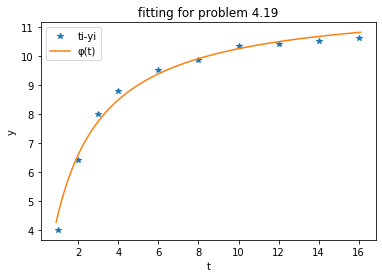

In [56]:
plt.plot(t,y, '*',label='ti-yi')  # 原函数散点
X=np.arange(t[0]-0.1,t[-1]+0.1,0.01)
Y=1/(α[0]+α[1]/X)
plt.plot(X, Y, '-',label='φ(t)')  # 拟合函数φ(x)
plt.xlabel('t')  # 给 x 轴添加坐标轴信息
plt.ylabel('y')  # 给 y 轴添加坐标轴信息
plt.legend()
plt.title('fitting for problem 4.19')  # 添加图片标题
plt.show()

In [69]:
yi2=y**2
times=0
wi=y**4
last=np.zeros(wi.shape)
α=np.array([0.08374324, 0.13830808])

In [70]:
#用迭代法求最优α
λ=0.8
dy=y-1/(α[0]+α[1]/t)    #残差数列
δ2=np.sum(dy**2) #残差平方和
print(times,δ2,α)
while times <1000 and np.sum((last - wi) ** 2) > 1e-18:
    times+=1
    last = wi
    φi = 1 / (α[0] + α[1] * xi)
    wi = (1-λ)*last + λ*yi2 * (φi ** 2)
    g11 = wi.sum()
    g12 = wi.dot(xi)
    g22 = wi.dot(xi * xi)
    G = np.array([[g11, g12], [g12, g22]])
    d = np.array([wi.dot(zi), wi.dot(zi * xi)])
    α = alg.solve(G, d)
    dy=y-1/(α[0]+α[1]/t)    #残差数列
    δ2=np.sum(dy**2) #残差平方和
    print(times,δ2,α)
α

0 0.5903704320664918 [0.08374324 0.13830808]
1 0.5929414595505227 [0.08384674 0.13741954]
2 0.5913234561882937 [0.08380182 0.13788046]
3 0.5911156510967894 [0.08379647 0.1379478 ]
4 0.5910835383717132 [0.08379589 0.13795792]
5 0.5910783307367817 [0.08379584 0.13795945]
6 0.5910774621090791 [0.08379584 0.13795969]
7 0.5910773134277993 [0.08379585 0.13795973]
8 0.5910772873303761 [0.08379585 0.13795973]
9 0.59107728263991 [0.08379585 0.13795973]
10 0.5910772817787361 [0.08379585 0.13795973]
11 0.5910772816176852 [0.08379585 0.13795973]
12 0.5910772815871012 [0.08379585 0.13795973]
13 0.5910772815812202 [0.08379585 0.13795973]
14 0.5910772815800799 [0.08379585 0.13795973]
15 0.5910772815798562 [0.08379585 0.13795973]
16 0.5910772815798121 [0.08379585 0.13795973]
17 0.5910772815798037 [0.08379585 0.13795973]
18 0.5910772815798018 [0.08379585 0.13795973]
19 0.5910772815798001 [0.08379585 0.13795973]


array([0.08379585, 0.13795973])

In [23]:
# #用迭代法求最优α
# while times <1000 and np.sum((last - wi) ** 2) > 1e-18:
#     times+=1
#     last = wi
#     φi = 1 / (α[0] + α[1] * xi)
#     wi = (last + yi2 * (φi ** 2)) / 2
# #     wi = yi2 * (φi ** 2)
#     g11 = wi.sum()
#     g12 = wi.dot(xi)
#     g22 = wi.dot(xi * xi)
#     G = np.array([[g11, g12], [g12, g22]])
#     d = np.array([wi.dot(zi), wi.dot(zi * xi)])
#     α = alg.solve(G, d)
#     dy=y-1/(α[0]+α[1]/t)    #残差数列
#     δ2=np.sum(dy**2) #残差平方和
#     print(times,δ2,α)
# α